In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F

import train_test 

from models import GAT, GCN, GraphSAGE

/home/miguels/Proyecto_GNN/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
from torch_geometric.data import Dataset

import os.path as osp

class MyOwnDatasetFixedKnn(Dataset):
    def __init__(self, root, path, enable = False , transform=None, pre_transform=None, pre_filter=None):
      self.path = path
      self.enable = enable
      super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return self.path

    @property
    def processed_file_names(self):
      if self.enable == False:
        return [f'data_{i}.pt' for i in range(10)]
      else: 
        return [f'data_{i}.pt' for i in range(109)]

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [4]:
from torch_geometric.loader import DataLoader

path1 = "UrbanSound8K_8276.csv"
path2 = "TF_YaMNet_mean.hdf5"
dataset = MyOwnDatasetFixedKnn(root = "../own_dataset/data_YaMNet_mean_fixed_knn", path = [path1,path2])
loader_dataset = DataLoader(dataset)

In [5]:
dataset

MyOwnDatasetFixedKnn(10)

# KNN fijo

In [6]:
#GAT

  
prom_acc_gat = []
dev_values_gat = []
num_epochs_gat = []

#GCN


prom_acc_gcn = []
dev_values_gcn = []
num_epochs_gcn = []

#SAGE


prom_acc_sage = []
dev_values_sage = []
num_epochs_sage = []

In [8]:
for i in range(30,2230,200):
#GAT

  acc_gat = []
 

#GCN

  acc_gcn = []


#SAGE

  acc_sage = []


  for n, graphs in enumerate(loader_dataset):
      
#==========================GAT===============================================
      graphs.to(device)
      gat = GAT(1024, 20, 10).to(device)
      train_test.train(gat, graphs, epoch = i, enable = False)
      acc_gat.append(train_test.test(gat, graphs, graphs.test_mask))

#==========================GCN===============================================  

      
      gcn = GCN(1024, 20, 10).to(device)
      train_test.train(gcn, graphs, epoch = i, enable = False)
      acc_gcn.append(train_test.test(gcn, graphs, graphs.test_mask))

#==========================SAGE=============================================== 

      
      g_sage = GraphSAGE(1024, 20, 10).to(device)
      train_test.train(g_sage, graphs, epoch = i, enable = False)
      acc_sage.append(train_test.test(g_sage, graphs, graphs.test_mask))

#==========================GAT===============================================

  prom_acc_gat.append(np.mean(acc_gat))
  dev_values_gat.append(np.std(acc_gat))
  num_epochs_gat.append(i)

#==========================GCN===============================================  

  prom_acc_gcn.append(np.mean(acc_gcn))
  dev_values_gcn.append(np.std(acc_gcn))
  num_epochs_gcn.append(i)

#==========================SAGE===============================================  

  prom_acc_sage.append(np.mean(acc_sage))
  dev_values_sage.append(np.std(acc_sage))
  num_epochs_sage.append(i)

  print(f"GAT\n accuracy mean: {np.mean(acc_gat)*100:.2f}% | standard deviation: {np.std(acc_gat):.2f} | epochs: {i}\n"
        f"GCN\n accuracy mean: {np.mean(acc_gcn)*100:.2f}% | standard deviation: {np.std(acc_gcn):.2f} | epochs: {i}\n"
        f"SAGE\n accuracy mean: {np.mean(acc_sage)*100:.2f}% | standard deviation: {np.std(acc_sage):.2f} | epochs: {i}\n\n"
        f"==============================================================================================================")

GAT
 accuracy mean: 69.99% | standard deviation: 0.06 | epochs: 30
GCN
 accuracy mean: 55.36% | standard deviation: 0.09 | epochs: 30
SAGE
 accuracy mean: 47.41% | standard deviation: 0.07 | epochs: 30

GAT
 accuracy mean: 77.74% | standard deviation: 0.05 | epochs: 230
GCN
 accuracy mean: 75.42% | standard deviation: 0.04 | epochs: 230
SAGE
 accuracy mean: 74.78% | standard deviation: 0.03 | epochs: 230

GAT
 accuracy mean: 77.01% | standard deviation: 0.05 | epochs: 430
GCN
 accuracy mean: 77.10% | standard deviation: 0.04 | epochs: 430
SAGE
 accuracy mean: 75.87% | standard deviation: 0.04 | epochs: 430

GAT
 accuracy mean: 77.49% | standard deviation: 0.05 | epochs: 630
GCN
 accuracy mean: 77.67% | standard deviation: 0.04 | epochs: 630
SAGE
 accuracy mean: 76.05% | standard deviation: 0.04 | epochs: 630

GAT
 accuracy mean: 76.78% | standard deviation: 0.04 | epochs: 830
GCN
 accuracy mean: 77.17% | standard deviation: 0.04 | epochs: 830
SAGE
 accuracy mean: 76.67% | standard devi

In [9]:
arr_num_epochs_gat = np.array(num_epochs_gat)
arr_prom_acc_gat = np.array(prom_acc_gat)
arr_dev_values_gat = np.array(dev_values_gat)


arr_num_epochs_gcn = np.array(num_epochs_gcn)
arr_prom_acc_gcn = np.array(prom_acc_gcn)
arr_dev_values_gcn = np.array(dev_values_gcn)

arr_num_epochs_sage = np.array(num_epochs_sage)
arr_prom_acc_sage = np.array(prom_acc_sage)
arr_dev_values_sage = np.array(dev_values_sage)


In [10]:
f = h5py.File("./variacion_epochs_YaMNet.hdf5", "w")

dset = f.create_dataset("Numero_epochs_GAT", arr_num_epochs_gat.shape, data = arr_num_epochs_gat)
dset = f.create_dataset("Promedios_Acc_GAT", arr_prom_acc_gat.shape, data = arr_prom_acc_gat)
dset = f.create_dataset("desviacion_GAT", arr_dev_values_gat.shape, data = arr_dev_values_gat)

dset = f.create_dataset("Numero_epochs_GCN", arr_num_epochs_gcn.shape, data = arr_num_epochs_gcn)
dset = f.create_dataset("Promedios_Acc_GCN", arr_prom_acc_gcn.shape, data = arr_prom_acc_gcn)
dset = f.create_dataset("desviacion_GCN", arr_dev_values_gcn.shape, data = arr_dev_values_gcn)

dset = f.create_dataset("Numero_epochs_SAGE", arr_num_epochs_sage.shape, data = arr_num_epochs_sage)
dset = f.create_dataset("Promedios_Acc_SAGE", arr_prom_acc_sage.shape, data = arr_prom_acc_sage)
dset = f.create_dataset("desviacion_SAGE", arr_dev_values_sage.shape, data = arr_dev_values_sage)


f.close()

In [11]:
file_epochs = h5py.File("./variacion_epochs_YaMNet.hdf5", "r")

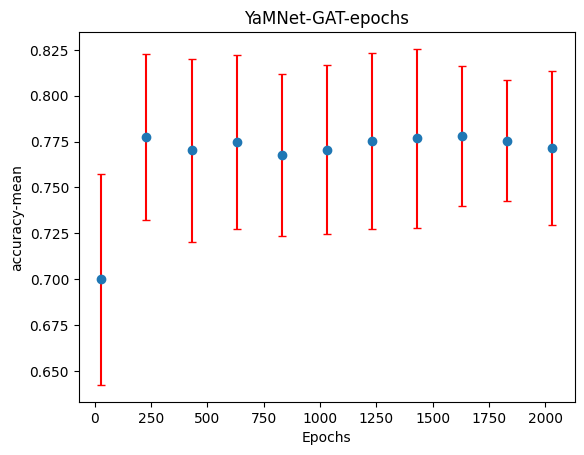

In [12]:
plt.title('YaMNet-GAT-epochs')
plt.errorbar(list(file_epochs["Numero_epochs_GAT"]), list(file_epochs["Promedios_Acc_GAT"]),  yerr=list(file_epochs["desviacion_GAT"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')

#plt.savefig("/content/drive/MyDrive/nuevo_codigo/YaMNet-GAT-epochs.tiff", dpi = 300)

plt.show()

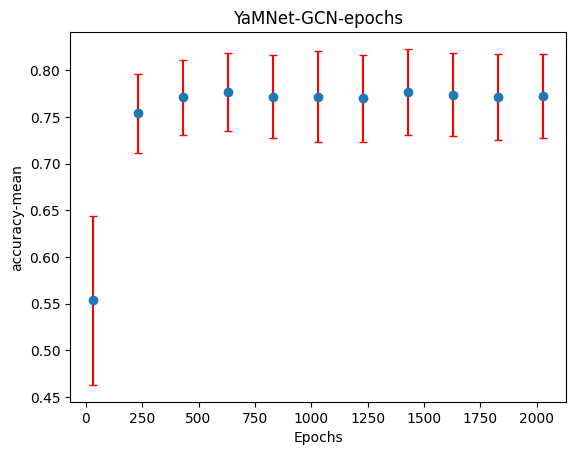

In [13]:
plt.title('YaMNet-GCN-epochs')
plt.errorbar(list(file_epochs["Numero_epochs_GCN"]), list(file_epochs["Promedios_Acc_GCN"]),  yerr=list(file_epochs["desviacion_GCN"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')
plt.show()

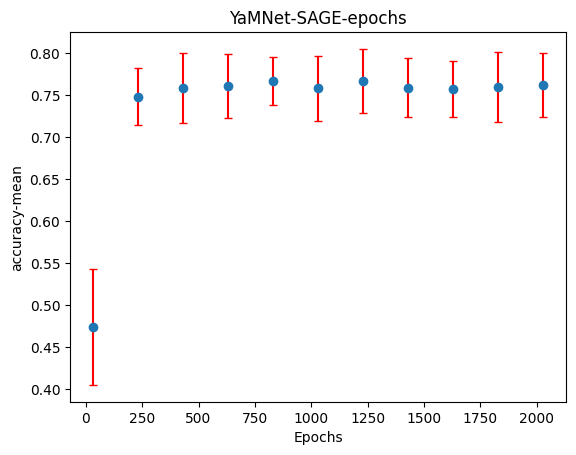

In [14]:
plt.title('YaMNet-SAGE-epochs')
plt.errorbar(list(file_epochs["Numero_epochs_SAGE"]), list(file_epochs["Promedios_Acc_SAGE"]),  yerr=list(file_epochs["desviacion_SAGE"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')
plt.show()

# Variando numero de K vecinos

In [12]:
path1 = "UrbanSound8K_8276.csv"
path2 = "TF_YaMNet_mean.hdf5"
dataset = MyOwnDatasetFixedKnn(root = "../own_dataset/data_YaMNet_mean_varying_knn", path = [path1,path2], enable = True)
#loader_dataset = DataLoader(dataset)

In [13]:
dataset

MyOwnDatasetFixedKnn(109)

In [14]:
# GAT

K_values_gat = []
prom_acc_gat = []
dev_values_gat = []


#GCN

K_values_gcn = []
prom_acc_gcn = []
dev_values_gcn = []

#SAGE

K_values_sage = []
prom_acc_sage = []
dev_values_sage = []

In [15]:
K_values = list(range(5,105,10))
epochs = 430

In [16]:
l = 0

for j in range(0, 10):
  # GAT

  acc_gat = []
 


#GCN

  acc_gcn = []
  

#SAGE

  acc_sage = []
  

  for i in range(l, l + 10):

      data_gpu = dataset[i].to(device)
#==========================GAT===============================================
      
      gat = GAT(1024, 20, 10).to(device)
      train_test.train(gat, data_gpu, epoch = epochs, enable = False)
      acc_gat.append(train_test.test(gat, data_gpu, data_gpu.test_mask))

#==========================GCN===============================================  

      
      gcn = GCN(1024, 20, 10).to(device)
      train_test.train(gcn, data_gpu, epoch = epochs, enable = False)
      acc_gcn.append(train_test.test(gcn, data_gpu, data_gpu.test_mask))

#==========================SAGE=============================================== 

      
      g_sage = GraphSAGE(1024, 20, 10).to(device)
      train_test.train(g_sage, data_gpu, epoch = epochs, enable = False)
      acc_sage.append(train_test.test(g_sage, data_gpu, data_gpu.test_mask))

#==========================GAT===============================================
  l = i + 1
  prom_acc_gat.append(np.mean(acc_gat))
  dev_values_gat.append(np.std(acc_gat))
  

#==========================GCN===============================================  

  prom_acc_gcn.append(np.mean(acc_gcn))
  dev_values_gcn.append(np.std(acc_gcn))
  

#==========================SAGE===============================================  

  prom_acc_sage.append(np.mean(acc_sage))
  dev_values_sage.append(np.std(acc_sage))
  

  print(f"GAT\n accuracy mean: {np.mean(acc_gat)*100:.2f}% | standard deviation: {np.std(acc_gat):.2f} | Valor de K: {K_values[j]}\n"
        f"GCN\n accuracy mean: {np.mean(acc_gcn)*100:.2f}% | standard deviation: {np.std(acc_gcn):.2f} | Valor de K: {K_values[j]}\n"
        f"SAGE\n accuracy mean: {np.mean(acc_sage)*100:.2f}% | standard deviation: {np.std(acc_sage):.2f} | Valor de K: {K_values[j]}\n\n"
        f"==============================================================================================================")
  
  torch.cuda.empty_cache()


GAT
 accuracy mean: 77.59% | standard deviation: 0.05 | Valor de K: 5
GCN
 accuracy mean: 77.52% | standard deviation: 0.04 | Valor de K: 5
SAGE
 accuracy mean: 75.91% | standard deviation: 0.04 | Valor de K: 5

GAT
 accuracy mean: 75.31% | standard deviation: 0.05 | Valor de K: 15
GCN
 accuracy mean: 74.90% | standard deviation: 0.04 | Valor de K: 15
SAGE
 accuracy mean: 75.22% | standard deviation: 0.04 | Valor de K: 15

GAT
 accuracy mean: 75.42% | standard deviation: 0.05 | Valor de K: 25
GCN
 accuracy mean: 73.34% | standard deviation: 0.05 | Valor de K: 25
SAGE
 accuracy mean: 75.14% | standard deviation: 0.04 | Valor de K: 25

GAT
 accuracy mean: 74.47% | standard deviation: 0.05 | Valor de K: 35
GCN
 accuracy mean: 71.70% | standard deviation: 0.06 | Valor de K: 35
SAGE
 accuracy mean: 73.87% | standard deviation: 0.04 | Valor de K: 35

GAT
 accuracy mean: 75.14% | standard deviation: 0.04 | Valor de K: 45
GCN
 accuracy mean: 71.58% | standard deviation: 0.05 | Valor de K: 45
S

In [17]:
arr_K_values= np.array(K_values)
arr_prom_acc_gat = np.array(prom_acc_gat)
arr_dev_values_gat = np.array(dev_values_gat)


arr_K_values = np.array(K_values)
arr_prom_acc_gcn = np.array(prom_acc_gcn)
arr_dev_values_gcn = np.array(dev_values_gcn)

arr_K_values = np.array(K_values)
arr_prom_acc_sage = np.array(prom_acc_sage)
arr_dev_values_sage = np.array(dev_values_sage)

In [18]:
f = h5py.File("./variacion_knn_YaMNet.hdf5", "w")

dset = f.create_dataset("Numero_knn_GAT", arr_K_values.shape, data = arr_K_values)
dset = f.create_dataset("Promedios_Acc_GAT", arr_prom_acc_gat.shape, data = arr_prom_acc_gat)
dset = f.create_dataset("desviacion_GAT", arr_dev_values_gat.shape, data = arr_dev_values_gat)

dset = f.create_dataset("Numero_knn_GCN", arr_K_values.shape, data = arr_K_values)
dset = f.create_dataset("Promedios_Acc_GCN", arr_prom_acc_gcn.shape, data = arr_prom_acc_gcn)
dset = f.create_dataset("desviacion_GCN", arr_dev_values_gcn.shape, data = arr_dev_values_gcn)

dset = f.create_dataset("Numero_knn_SAGE", arr_K_values.shape, data = arr_K_values)
dset = f.create_dataset("Promedios_Acc_SAGE", arr_prom_acc_sage.shape, data = arr_prom_acc_sage)
dset = f.create_dataset("desviacion_SAGE", arr_dev_values_sage.shape, data = arr_dev_values_sage)


f.close()

In [19]:
file_KNN = h5py.File("./variacion_knn_YaMNet.hdf5", "r")

Text(0, 0.5, 'accuracy-mean')

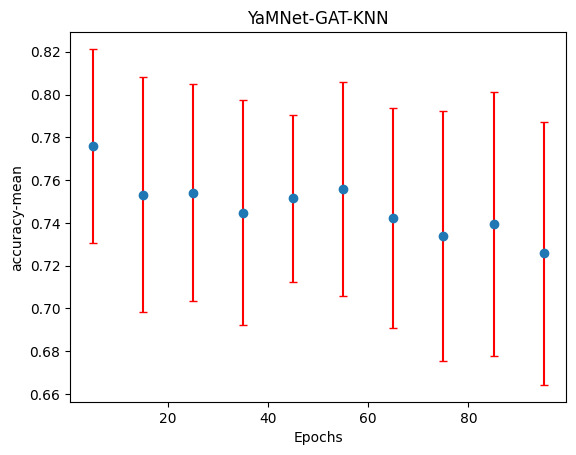

In [20]:
plt.title('YaMNet-GAT-KNN')
plt.errorbar(list(file_KNN["Numero_knn_GAT"]), list(file_KNN["Promedios_Acc_GAT"]),  yerr=list(file_KNN["desviacion_GAT"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')

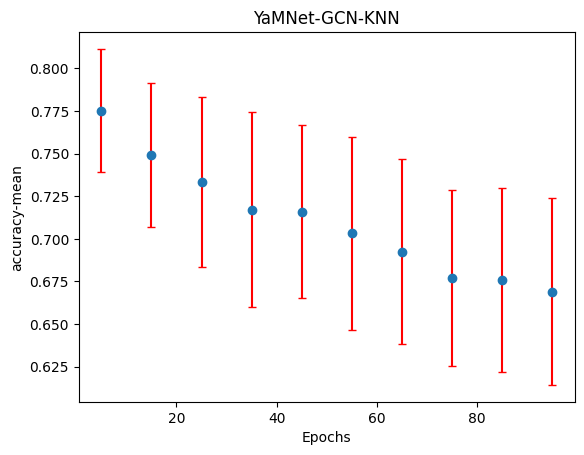

In [21]:
plt.title('YaMNet-GCN-KNN')
plt.errorbar(list(file_KNN["Numero_knn_GCN"]), list(file_KNN["Promedios_Acc_GCN"]),  yerr=list(file_KNN["desviacion_GCN"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')
plt.show()

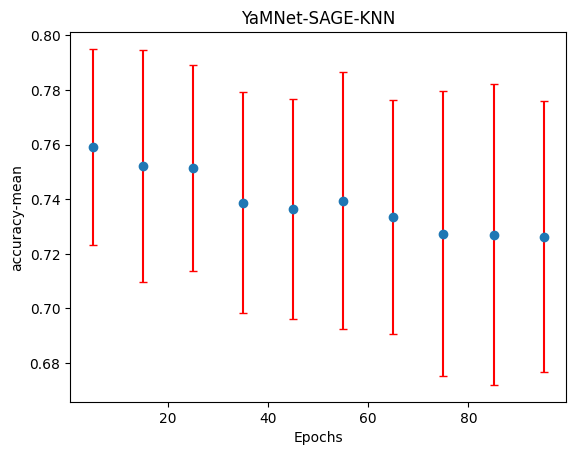

In [22]:
plt.title('YaMNet-SAGE-KNN')
plt.errorbar(list(file_KNN["Numero_knn_SAGE"]), list(file_KNN["Promedios_Acc_SAGE"]),  yerr=list(file_KNN["desviacion_SAGE"]), fmt="o", capsize=3, ecolor="red")
plt.xlabel('Epochs')
plt.ylabel('accuracy-mean')
plt.show()